In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [8]:
dataset: 'https://www.kaggle.com/datasets/dansbecker/new-york-city-taxi-fare-prediction/download?datasetVersionNumber=1
df=pd.read_csv(dataset)

In [9]:
df.shape

(50000, 8)

In [11]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [13]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [14]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,2010-01-13 08:13:14.0000007,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [15]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [17]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [18]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
# 1.No null/void values 

# 2.Converting Obj datatypes

df=df.drop(["unique_id"],axis=1)

### Pandas "to_datetime()" function 
- Recognizes and parses different date and time formats from strings.<br>
- It uses a combination of pre-defined format codes, pattern matching, and heuristics to infer the correct date and time components from the input string.

In [12]:
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [14]:
#Replacing longitudes and latitudes column by Distance

In [15]:
from math import radians, cos,sin, asin,sqrt

def dist(ln1, ln2, lt1 , lt2):
    
    
    ln1 =radians(ln1)
    ln2 =radians(ln2)
    lt1 =radians(lt1)
    lt2 =radians(lt2)
    
    ln = ln2 - ln1
    lt = lt2 - lt1
    a = sin(lt/2)**2 + cos(lt1) * cos(lt2) * sin(ln/2)**2
    c = 2 * asin(sqrt(a))
    
    return(round (c * 6371, 2))
    


In [16]:
d = []
for i in range(df.shape[0]):
    d.append(dist(df["latitude_of_pickup"][i],df["latitude_of_dropoff"][i], df["longitude_of_pickup"][i], df["longitude_of_dropoff"][i]))

In [17]:
df["dist"] = d

In [18]:
df.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,dist
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.00
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.91
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.36


In [19]:
df.drop(["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"], axis=1, inplace=True)

In [20]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,dist
0,4.5,2009-06-15 17:26:21+00:00,1,0.41
1,16.9,2010-01-05 16:52:16+00:00,1,4.63
2,5.7,2011-08-18 00:35:00+00:00,2,1.00
3,7.7,2012-04-21 04:30:42+00:00,1,0.91
4,5.3,2010-03-09 07:51:00+00:00,1,1.36


In [21]:
week_days = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

df["weekday"] = df["date_time_of_pickup"].dt.weekday.map(week_days)

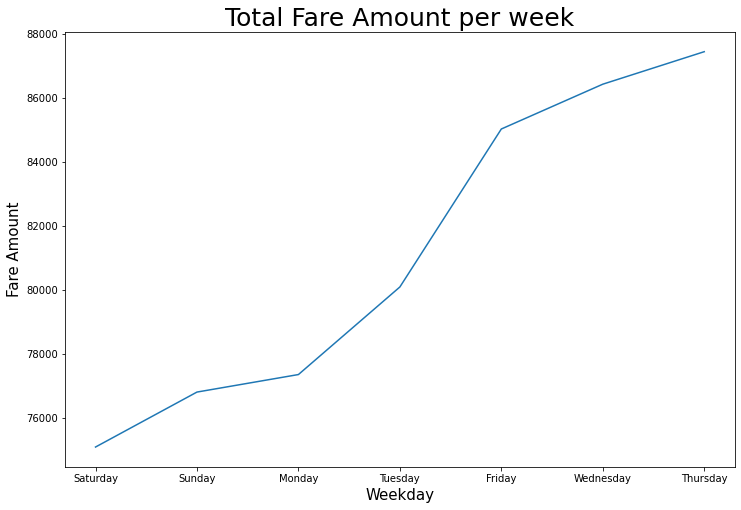

In [22]:
plt.figure(figsize = (12,8))
df.groupby("weekday")["amount"].sum().sort_values().plot()

plt.title("Total Fare Amount per week", fontsize=25)
plt.xlabel("Weekday", fontsize=15)
plt.ylabel("Fare Amount", fontsize=15)

plt.show()

In [23]:
week_days_encode = {"Sunday": 1, "Saturday": 2, "Monday": 3, "Tuesday": 4, "Friday": 5, "Wednesday": 6, "Thursday": 7}
df["weekday"] = df["weekday"].map(week_days_encode)


In [24]:
df.head()

,amount,date_time_of_pickup,no_of_passenger,dist,weekday
0,4.5,2009-06-15 17:26:21+00:00,1,0.41,1
1,16.9,2010-01-05 16:52:16+00:00,1,4.63,3
2,5.7,2011-08-18 00:35:00+00:00,2,1.00,6
3,7.7,2012-04-21 04:30:42+00:00,1,0.91,5
4,5.3,2010-03-09 07:51:00+00:00,1,1.36,3


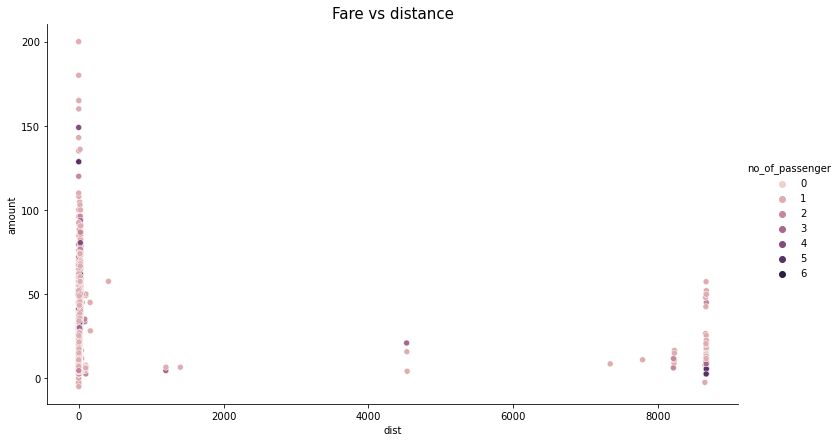

In [25]:
df["no_of_passenger"].value_counts()

## Graph - Fare vs Distance

sns.relplot(data = df, kind = "scatter",x = "dist",y = "amount",
            hue ="no_of_passenger",height=6 ,aspect = 1.75,)
plt.title("Fare vs distance" , fontsize=15)
plt.show()

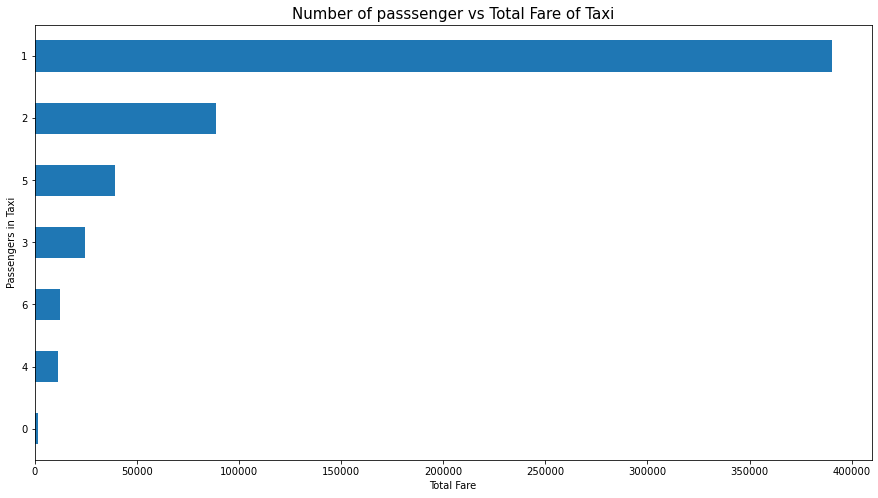

In [26]:
plt.figure(figsize=(15,8))
df.groupby("no_of_passenger")["amount"].sum().sort_values().plot.barh()
plt.xlabel("Total Fare",fontsize =10)
plt.ylabel("Passengers in Taxi", fontsize =10)
plt.title("Number of passsenger vs Total Fare of Taxi", fontsize = 15)
plt.show()

In [27]:
df.drop("date_time_of_pickup", axis=1, inplace=True)


In [28]:
df.head()

,amount,no_of_passenger,dist,weekday
0,4.5,1,0.41,1
1,16.9,1,4.63,3
2,5.7,2,1.00,6
3,7.7,1,0.91,5
4,5.3,1,1.36,3


## Removing duplicates

In [29]:
duplicate=df.duplicated()

In [30]:
print(duplicate.sum())
df[duplicate]

6986


,amount,no_of_passenger,dist,weekday
568,6.5,1,0.00,4
657,2.5,1,0.00,3
700,7.0,1,0.51,4
724,4.0,1,0.79,5
753,4.5,2,0.33,3
...,...,...,...,...
49990,4.5,1,0.21,6
49992,6.1,1,0.47,5
49993,7.3,1,1.47,6
49994,8.5,1,0.86,5


In [31]:
df.drop_duplicates(inplace=True)

In [32]:
X= df.drop(['amount'],axis=1)
y=df[['amount']]

In [33]:
dp = df.duplicated()
print(dp.sum())

0


In [34]:
## Saving dataset for further use
df.to_csv("df_transformed.csv", index=False)

df = pd.read_csv("df_transformed.csv")
df.head()

,amount,no_of_passenger,dist,weekday
0,4.5,1,0.41,1
1,16.9,1,4.63,3
2,5.7,2,1.00,6
3,7.7,1,0.91,5
4,5.3,1,1.36,3


## Linear Regression

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.75, random_state=1)


In [36]:
reg_model = LinearRegression(fit_intercept= True, normalize =True)
reg_model.fit(X_train , y_train)

LinearRegression(normalize=True)

In [37]:
reg_model

LinearRegression(normalize=True)

In [38]:
reg_model.score(X_train,y_train)

0.0016924252841329368

In [39]:
reg_model.score(X_test, y_test)


-0.0011673376041909655

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

LinearRegression()

In [41]:
print(poly_clf.score(X_train2, y_train))

0.0019305133317167877


In [42]:
print(poly_clf.score(X_test2 , y_test))

-0.0011849545430138164


## Handling Outliers

In [44]:
df = pd.read_csv("df_transformed.csv")
df.head()

,amount,no_of_passenger,dist,weekday
0,4.5,1,0.41,1
1,16.9,1,4.63,3
2,5.7,2,1.00,6
3,7.7,1,0.91,5
4,5.3,1,1.36,3


In [45]:
def remove_outlier(col):
    sorted(col)
    q1,q3=col.quantile([0.25,.75])
    IQR=q3-q1
    lower_range=q1-(1.5*IQR)
    upper_range=q3+(1.5*IQR)
    return lower_range,upper_range

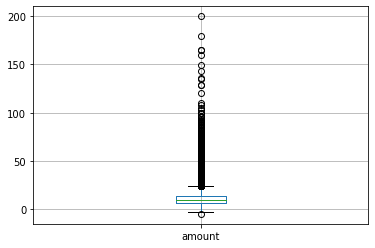

In [46]:
# 1.coulumn = amount

df.boxplot(column=["amount"])
plt.show()

In [47]:
x="amount"

low,upp=remove_outlier(df[x])
df[x]=np.where(df[x]>upp,upp,df[x])

df[x]=np.where(df[x]<low,low,df[x])


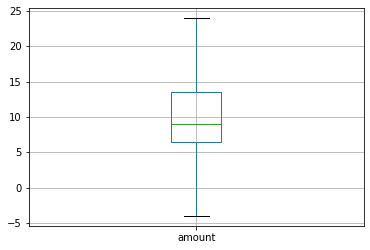

In [48]:
df.boxplot(column=["amount"])
plt.show()

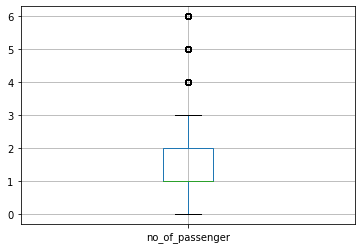

In [49]:
# 2.coulumn = no_of_passenger

df.boxplot(column=["no_of_passenger"])
plt.show()

In [50]:
x="no_of_passenger"

low,upp=remove_outlier(df[x])
df[x]=np.where(df[x]>upp,upp,df[x])

df[x]=np.where(df[x]<low,low,df[x])


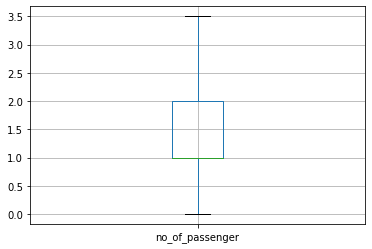

In [51]:
df.boxplot(column=["no_of_passenger"])
plt.show()

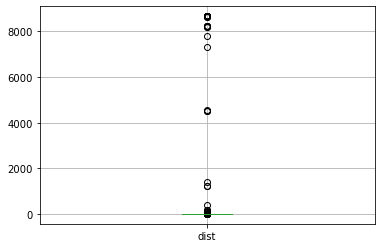

In [52]:
# 3.coulumn = dist

df.boxplot(column=["dist"])
plt.show()

In [53]:
x="dist"

low,upp=remove_outlier(df[x])
df[x]=np.where(df[x]>upp,upp,df[x])

df[x]=np.where(df[x]<low,low,df[x])


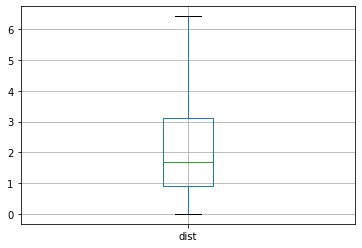

In [54]:
df.boxplot(column=["dist"])
plt.show()

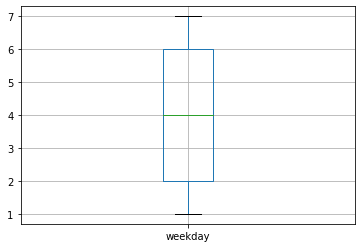

In [55]:
# 3.coulumn = Weekday
df.boxplot(column=["weekday"])
plt.show()
## No outlier

# Normalizing and Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
std_scale=StandardScaler()
std_scale

StandardScaler()

In [75]:
df = pd.read_csv("df_transformed.csv")
df.head()

,amount,no_of_passenger,dist,weekday
0,4.5,1,0.41,1
1,16.9,1,4.63,3
2,5.7,2,1.00,6
3,7.7,1,0.91,5
4,5.3,1,1.36,3


In [76]:
df['amount']=std_scale.fit_transform(df[['amount']])
df['no_of_passenger']=std_scale.fit_transform(df[['no_of_passenger']])
df['dist']=std_scale.fit_transform(df[['dist']])
df['weekday']=std_scale.fit_transform(df[['weekday']])


In [77]:
df.head()

,amount,no_of_passenger,dist,weekday
0,-0.750495,-0.559796,-0.052400,-1.558505
1,0.471444,-0.559796,-0.041545,-0.555272
2,-0.632243,0.179847,-0.050883,0.949578
3,-0.435156,-0.559796,-0.051114,0.447961
4,-0.671660,-0.559796,-0.049956,-0.555272


### Logistic Regression and SVC

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=1)


In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5,order='F', interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

LinearRegression()

In [118]:
print(poly_clf.score(X_train2, y_train))

0.000606246236498853


In [119]:
print(poly_clf.score(X_test2, y_test))


0.0002579835188913915


## Descision tree Regression

In [60]:
from sklearn.tree import DecisionTreeRegressor

In [144]:
model=DecisionTreeRegressor(criterion="friedman_mse",max_depth=5)

In [145]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [146]:
model.score(X_train,y_train)


0.6855593401535262

In [147]:
model.score(X_test,y_test)


0.6615183279829433

## Bagging Regression

In [65]:
from sklearn.ensemble import BaggingRegressor


In [66]:
model1=BaggingRegressor(n_estimators=14,base_estimator=model)


In [67]:
model1.fit(X_train,y_train)


BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                      max_depth=3),
                 n_estimators=14)

In [68]:
model1.score(X_train,y_train)


0.6234683152700078

In [69]:
model1.score(X_test,y_test)


0.6616506678302065

In [148]:
from sklearn.svm import SVR

In [149]:
model_3=SVR(kernel='rbf',C=4,gamma=0.00009)
model_3.fit(X_train,y_train)
model_3.score(X_train,y_train)

0.6102320389378024

In [150]:
model_3.score(X_test,y_test)

0.6020403120033209

### No Categorical Data so logistic Regression and classification not required